<h1><center>Diplomado de Ciencias de Datos - Trabajo Final - Octubre 2021</center></h1> 
<h2><center>Caso Práctico: Sistema Provincial de Expedientes (SIE)</center></h2> 
<h3><center>1° Parte</center></h3>
<h4><center>Ing. Romina C. Scarazzini</center></h4>

___
# Objetivo
El objetivo de este Trabajo Final en realizar un análisis de los datos del Sistema de Expediente Provincial (SIE) y en base a dicho análisis, predecir la cantidad de expedientes que se iniciarán en los próximos años
___
# Datos a Analizar
Los datos a utilizar son extraidos del SIE y están en un formato .txt
___
# Contenido
- Limpieza de Datos con Power BI: Para ver el detalle de lo realizado en este paso, ver el documento: "Limpieza de Datos con Power BI.pdf"
- **Exploración  y análisis de los datos (EDA)**
- Análisis de las características de Series Temporales
- Aplicación de modelos de Machine Learning, enfocados a Series Temporales
- Predicciones 2021

___
# Importación de Paquetes

In [1]:
# Instalación de paquetes para tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import datetime as dt
    
# Instalación de paquetes para gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from matplotlib.ticker import ScalarFormatter

import seaborn as sns
sns.set()

#Altair
#==========================================================
from vega_datasets import data # pip install vega_datasets
import altair as alt  # pip install altair

#Declaración del estilo
#=============================
plt.style.use("bmh")

#Configuración del tamaño de las visualizaciones para que se muestren bien en Jupyter
#==================================================
plt.rcParams["figure.figsize"] = 16, 5

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

___
# Importación del Dataset
- Luego de realizar la limpieza de los datos con Power BI, se genera un archivo en formato .csv, el cual contiene los datos limpios y sin valores nulos, listos para ser analizados. **El dataset contiene: 3.529.303 registros**

In [2]:
df_expte = pd.read_csv("Ult_Mov_Exptes_Mayores_2010.csv", sep=';')
#Parámetro para limitar la cantidad de filas y trabajar el dataset con menos recursos de la PC: nrows= 100000

___
# Limpieza y orden del dataset

In [3]:
#Cambio el nombre de algunas columnas
# ==============================================================================
df_expte = df_expte.rename(columns={'Id_Tipo_Org_Ofi_Remit': 'Id_Tipo_Org_Remit', 'Nom_Tipo_Org_Ofi_Remit': 'Nom_Tipo_Org_Remit',
                                    'Cod_Org_Ofi_Remit': 'Id_Org_Remit', 'Nom_Org_Ofi_Remit': 'Nom_Org_Remit',
                                   'Id_Tipo_Org_Ofi_Destino': 'Id_Tipo_Org_Destino', 'Nom_Tipo_Org_Ofi_Destino': 'Nom_Tipo_Org_Destino',
                                   'Cod_Org_Ofi_Destino': 'Id_Org_Destino', 'Nom_Org_Ofi_Destino': 'Nom_Org_Destino'})

In [4]:
#Re-ordeno las columnas
# ==============================================================================
variables= ['Id_Expte', 'Id_Fecha_Ini_Expte', 'Fecha_Ini_Expte', 'Id_Fecha_Ult_Mov_Expte', 'Fecha_Ult_Mov_Expte',
'Id_Oficina_Remitente', 'Id_Tipo_Org_Remit', 'Nom_Tipo_Org_Remit', 'Id_Org_Remit', 'Nom_Org_Remit', 
'Id_Oficina_Destino', 'Id_Tipo_Org_Destino', 'Nom_Tipo_Org_Destino', 'Id_Org_Destino', 'Nom_Org_Destino',
'Id_Tema', 'Nom_Tema','Concludio', 'Cant_Hojas']

df_expte = pd.DataFrame(df_expte, columns=variables)

___
# Diccionario de Datos
## Dataset
df_expte: Contiene el último movimiento realizado de cada expediente para un día determinado.

## Columnas:
- Id_Expte: Id. de cada registro 
- Id_Fecha_Ini_Expte: id de la fecha de inicio del expediente

- Fecha_Ini_Expte: Fecha del inicio del expediente

- Id_Fecha_Ult_Mov_Expte: id de la fecha del último movimiento del expediente
- Fecha_Ult_Mov_Expte: fecha del último movimiento del expediente

- Id_Oficina_Remitente: id de la oficina que remitió el expediente
- Id_Tipo_Org_Remit: id del tipo de organismo al cual pertenece la oficina que remitió el expediente. (Valores posibles: 1, 2 y 3)
- Nom_Tipo_Org_Remit: nombre del tipo de organismo al cual pertenece la oficina que remitió el expediente. Variable categórica (Valores posibles: "Adminsitración Central", "Organimos Descentralizado", "Organismo Externo")
- Id_Org_Remit: id del organismo al cual pertenece la oficina que remitió el expediente.
- Nom_Org_Remit: nombre del organismo al cual pertenece la oficina que remitió el expediente. Variable categórica. 

- Id_Oficina_Destino: id de la oficina que recibió el expediente
- Id_Tipo_Org_Destino: id del tipo de organismo al cual pertenece la oficina que recibió el expediente. (Valores posibles: 1, 2 y 3)
- Nom_Tipo_Org_Destino: nombre del tipo de organismo al cual pertenece la oficina que recibió el expediente. Variable categórica (Valores posibles: "Adminsitración Central", "Organimos Descentralizado", "Organismo Externo")
- Id_Org_Destino: id del organismo al cual pertenece la oficina que recibió el expediente.
- Nom_Org_Destino: nombre del organismo al cual pertenece la oficina que recibió el expediente. Variable categórica. 

  - Relación entre los datos de las oficinas: una oficina pertenece a un organismo dado y cada organismo pertenece a un tipo de organismo. Ejemplos:
    - Tipo de Organismo: 1 - Administración Central      Organismo: Ministerio de gestión Pública
    - Tipo de Organismo: 1 - Administración Central      Organismo: Ministerio Salud
    - Tipo de Organismo: 1 - Administración Central      Organismo: Ministerio Economía
    - Tipo de Organismo: 2 - Organismo Descentralizado   Organismo: Banco de Santa Fe
    - Tipo de Organismo: 2 - Organismo Descentralizado   Organismo: IAPOS
    - Tipo de Organismo: 2 - Organismo Descentralizado   Organismo: Administración Provincial de Impuestos (API)
    - Tipo de Organismo: 3 - Organismo Extern            Organismo: Organismo Externo
    - Tipo de Organismo: 3 - Organismo Externo           Organismo: Organismo Externo
    - Tipo de Organismo: 3 - Organismo Extern            Organismo: Organismo Externo

  - El campo tipo de organismo para los valores 1 y 2 (Administración Central y Organismo Descentralizado), tiene asociado n organismos, pero para el valor 3 (Organismo Externo) tiene asociado único valor "Organismo Externo", porque para este tipo de organismo no hay muchos registros, entonces se decidó no realizar la subdivisión en organismos.

- Id_Tema: Id. del tema del expediente
- Nom_Tema: Nombre del tema al cual se refiere el expediente. Variable categórica
- Concludio: Si el expediente está concluido o no. Este campo no es obligatorio de ingreso por la lo cual hay mucho expedientes que fueron cerrados, pero dicha acción no fue reflejada en el sistema.
- Cant_Hojas: Cantidad de hojas que contiene el expediente.

___
# Análisis y Exploración de los Datos

In [55]:
#Visualizo los datos del dataset
#======================================
df_expte.head(5)

Id_Expte  Id_Fecha_Ini_Expte          Fecha_Ini_Expte  \
0   3650003            20131212  2013-12-12 00:00:00,000   
1   3650004            20131212  2013-12-12 00:00:00,000   
2   3650009            20131212  2013-12-12 00:00:00,000   
3   3650013            20131212  2013-12-12 00:00:00,000   
4   3650014            20131212  2013-12-12 00:00:00,000   

   Id_Fecha_Ult_Mov_Expte      Fecha_Ult_Mov_Expte  Id_Oficina_Remitente  \
0                20131227  2013-12-27 00:00:00,000                  9614   
1                20131227  2013-12-27 00:00:00,000                  9614   
2                20131227  2013-12-27 00:00:00,000                  9614   
3                20131227  2013-12-27 00:00:00,000                  9614   
4                20131227  2013-12-27 00:00:00,000                  9614   

   Id_Tipo_Org_Remit         Nom_Tipo_Org_Remit  Id_Org_Remit  \
0                  2  Organismo Descentralizado           134   
1                  2  Organismo Descentralizado           134   
2                  2  Organismo Descentralizado           134   
3                  2  Organismo Descentralizado           134   
4                  2  Organismo Descentralizado           134   

                                    Nom_Org_Remit  Id_Oficina_Destino  \
0  Servicio de Catastro e Información Territorial               12194   
1  Servicio de Catastro e Información Territorial               12194   
2  Servicio de Catastro e Información Territorial               12194   
3  Servicio de Catastro e Información Territorial               12194   
4  Servicio de Catastro e Información Territorial               12194   

   Id_Tipo_Org_Destino Nom_Tipo_Org_Destino  Id_Org_Destino  \
0                    3    Organismo Externo             299   
1                    3    Organismo Externo             299   
2                    3    Organismo Externo             299   
3                    3    Organismo Externo             299   
4                    3    Organismo Externo             299   

     Nom_Org_Destino  Id_Tema                              Nom_Tema  \
0  Organismo Externo     3520  CERTIFICADO CATASTRAL - PLAZO NORMAL   
1  Organismo Externo     3520  CERTIFICADO CATASTRAL - PLAZO NORMAL   
2  Organismo Externo     3520  CERTIFICADO CATASTRAL - PLAZO NORMAL   
3  Organismo Externo     3520  CERTIFICADO CATASTRAL - PLAZO NORMAL   
4  Organismo Externo     3520  CERTIFICADO CATASTRAL - PLAZO NORMAL   

   Concludio  Cant_Hojas  
0      False           3  
1      False           3  
2      False           3  
3      False           3  
4      False           3

In [56]:
#Visualizo los tipos de datos del dataset
#==========================================================
df_expte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3529303 entries, 0 to 3529302
Data columns (total 19 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   Id_Expte                int64 
 1   Id_Fecha_Ini_Expte      int64 
 2   Fecha_Ini_Expte         object
 3   Id_Fecha_Ult_Mov_Expte  int64 
 4   Fecha_Ult_Mov_Expte     object
 5   Id_Oficina_Remitente    int64 
 6   Id_Tipo_Org_Remit       int64 
 7   Nom_Tipo_Org_Remit      object
 8   Id_Org_Remit            int64 
 9   Nom_Org_Remit           object
 10  Id_Oficina_Destino      int64 
 11  Id_Tipo_Org_Destino     int64 
 12  Nom_Tipo_Org_Destino    object
 13  Id_Org_Destino          int64 
 14  Nom_Org_Destino         object
 15  Id_Tema                 int64 
 16  Nom_Tema                object
 17  Concludio               bool  
 18  Cant_Hojas              int64 
dtypes: bool(1), int64(11), object(7)
memory usage: 488.0+ MB


In [7]:
#Cuento la cantidad de valores para cada columna
#================================================
df_expte.count()

Id_Expte                  3529303
Id_Fecha_Ini_Expte        3529303
Fecha_Ini_Expte           3529303
Id_Fecha_Ult_Mov_Expte    3529303
Fecha_Ult_Mov_Expte       3529303
Id_Oficina_Remitente      3529303
Id_Tipo_Org_Remit         3529303
Nom_Tipo_Org_Remit        3529303
Id_Org_Remit              3529303
Nom_Org_Remit             3529303
Id_Oficina_Destino        3529303
Id_Tipo_Org_Destino       3529303
Nom_Tipo_Org_Destino      3529303
Id_Org_Destino            3529303
Nom_Org_Destino           3529303
Id_Tema                   3529303
Nom_Tema                  3529303
Concludio                 3529303
Cant_Hojas                3529303
dtype: int64

In [14]:
#Controlo que el dataset no tengo valores nulos
#==========================================================
df_expte.isna()

Id_Expte  Id_Fecha_Ini_Expte  Fecha_Ini_Expte  \
0           False               False            False   
1           False               False            False   
2           False               False            False   
3           False               False            False   
4           False               False            False   
...           ...                 ...              ...   
3529298     False               False            False   
3529299     False               False            False   
3529300     False               False            False   
3529301     False               False            False   
3529302     False               False            False   

         Id_Fecha_Ult_Mov_Expte  Fecha_Ult_Mov_Expte  Id_Oficina_Remitente  \
0                         False                False                 False   
1                         False                False                 False   
2                         False                False                 False   
3                         False                False                 False   
4                         False                False                 False   
...                         ...                  ...                   ...   
3529298                   False                False                 False   
3529299                   False                False                 False   
3529300                   False                False                 False   
3529301                   False                False                 False   
3529302                   False                False                 False   

         Id_Tipo_Org_Remit  Nom_Tipo_Org_Remit  Id_Org_Remit  Nom_Org_Remit  \
0                    False               False         False          False   
1                    False               False         False          False   
2                    False               False         False          False   
3                    False               False         False          False   
4                    False               False         False          False   
...                    ...                 ...           ...            ...   
3529298              False               False         False          False   
3529299              False               False         False          False   
3529300              False               False         False          False   
3529301              False               False         False          False   
3529302              False               False         False          False   

         Id_Oficina_Destino  Id_Tipo_Org_Destino  Nom_Tipo_Org_Destino  \
0                     False                False                 False   
1                     False                False                 False   
2                     False                False                 False   
3                     False                False                 False   
4                     False                False                 False   
...                     ...                  ...                   ...   
3529298               False                False                 False   
3529299               False                False                 False   
3529300               False                False                 False   
3529301               False                False                 False   
3529302               False                False                 False   

         Id_Org_Destino  Nom_Org_Destino  Id_Tema  Nom_Tema  Concludio  \
0                 False            False    False     False      False   
1                 False            False    False     False      False   
2                 False            False    False     False      False   
3                 False            False    False     False      False   
4                 False            False    False     False      False   
...                 ...              ...      ...       ...        ...   
3529298           F

In [8]:
#Controlo que el dataset no tengo valores nulos
#==========================================================
df_expte.isna().sum()

Id_Expte                  0
Id_Fecha_Ini_Expte        0
Fecha_Ini_Expte           0
Id_Fecha_Ult_Mov_Expte    0
Fecha_Ult_Mov_Expte       0
Id_Oficina_Remitente      0
Id_Tipo_Org_Remit         0
Nom_Tipo_Org_Remit        0
Id_Org_Remit              0
Nom_Org_Remit             0
Id_Oficina_Destino        0
Id_Tipo_Org_Destino       0
Nom_Tipo_Org_Destino      0
Id_Org_Destino            0
Nom_Org_Destino           0
Id_Tema                   0
Nom_Tema                  0
Concludio                 0
Cant_Hojas                0
dtype: int64

In [5]:
#Cambio los tipos de datos de los campos Fecha_Ini_Expte y Fecha_Ult_Mov_Expte a datetime
# ====================================================================================================
df_expte['Fecha_Ini_Expte'] = pd.to_datetime(df_expte['Fecha_Ini_Expte'], yearfirst = True)
df_expte['Fecha_Ult_Mov_Expte'] = pd.to_datetime(df_expte['Fecha_Ult_Mov_Expte'], yearfirst = True)

___
### Sepración de los Datos del 2021 en otro dataframe

In [10]:
print(df_expte.max())

Id_Expte                                                            5089486
Id_Fecha_Ini_Expte                                                 20210804
Fecha_Ini_Expte                                         2021-08-04 00:00:00
Id_Fecha_Ult_Mov_Expte                                             20210805
Fecha_Ult_Mov_Expte                                     2021-08-05 00:00:00
Id_Oficina_Remitente                                                  12197
Id_Tipo_Org_Remit                                                         3
Nom_Tipo_Org_Remit                                        Organismo Externo
Id_Org_Remit                                                            299
Nom_Org_Remit               Tribunal de Cuentas de la Provincia de Santa Fe
Id_Oficina_Destino                                                    12197
Id_Tipo_Org_Destino                                                       3
Nom_Tipo_Org_Destino                                      Organismo Externo
Id_Org_Desti

In [6]:
df_expte = df_expte.set_index(['Fecha_Ini_Expte'])
df_expte2021 = df_expte.loc['2021-01-01':'2021-08-04'].reset_index()

In [12]:
df_expte2021.count()

Fecha_Ini_Expte           151816
Id_Expte                  151816
Id_Fecha_Ini_Expte        151816
Id_Fecha_Ult_Mov_Expte    151816
Fecha_Ult_Mov_Expte       151816
Id_Oficina_Remitente      151816
Id_Tipo_Org_Remit         151816
Nom_Tipo_Org_Remit        151816
Id_Org_Remit              151816
Nom_Org_Remit             151816
Id_Oficina_Destino        151816
Id_Tipo_Org_Destino       151816
Nom_Tipo_Org_Destino      151816
Id_Org_Destino            151816
Nom_Org_Destino           151816
Id_Tema                   151816
Nom_Tema                  151816
Concludio                 151816
Cant_Hojas                151816
dtype: int64

___
## Eliminar Datos del año 2021

In [7]:
#Genero un índice con la columna Fecha_Ini_Expte, para optimizar el proceso de los datos
#================================================================================
#df_expte = df_expte.set_index(['Fecha_Ini_Expte'])

#Elimino los registro del año 2021, ya que no tengo el año completo
#==============================================================================
df_expte = df_expte.loc['2011-01-01':'2020-12-31'].reset_index()

## Reducción del Dataset
- Para realizar el procesamiento de los datos, reduzco el dataset a una muestra de 0,05%
- Luego cuando haya temrinado el análisis ejecutaré el Notebook con el dataset completo
- Las conclusiones finales se obtendrán del análisis de dataset completo
- Utilizo semilla igual a 9, para que siempre se trabaje con la misma muestra de datos

In [8]:
df_expte_sample= df_expte.sample(frac=1, random_state=9)

In [9]:
#Visualizo el dataset reducido
# ====================================
df_expte_sample.head(3)

Fecha_Ini_Expte  Id_Expte  Id_Fecha_Ini_Expte  Id_Fecha_Ult_Mov_Expte  \
208187      2013-12-13   3650922            20131213                20140116   
866658      2017-02-09   3853827            20170209                20170220   
595806      2014-09-15   4302833            20140915                20180327   

       Fecha_Ult_Mov_Expte  Id_Oficina_Remitente  Id_Tipo_Org_Remit  \
208187          2014-01-16                  9614                  2   
866658          2017-02-20                  9614                  2   
595806          2018-03-27                 10172                  2   

               Nom_Tipo_Org_Remit  Id_Org_Remit  \
208187  Organismo Descentralizado           134   
866658  Organismo Descentralizado           134   
595806  Organismo Descentralizado           152   

                                         Nom_Org_Remit  Id_Oficina_Destino  \
208187  Servicio de Catastro e Información Territorial               12194   
866658  Servicio de Catastro e Información Territorial               12196   
595806    Dirección Provincial de Vivienda y Urbanismo               10234   

        Id_Tipo_Org_Destino       Nom_Tipo_Org_Destino  Id_Org_Destino  \
208187                    3          Organismo Externo             299   
866658                    3          Organismo Externo             299   
595806                    2  Organismo Descentralizado             152   

                                     Nom_Org_Destino  Id_Tema  \
208187                             Organismo Externo     3520   
866658                             Organismo Externo     3520   
595806  Dirección Provincial de Vivienda y Urbanismo     3931   

                                    Nom_Tema  Concludio  Cant_Hojas  
208187  CERTIFICADO CATASTRAL - PLAZO NORMAL      False           3  
866658  CERTIFICADO CATASTRAL - PLAZO NORMAL      False           3  
595806                   ANTICIPO FINANCIERO      False           8

___
## Preparación de los Datos para comenzar a graficar

In [10]:
#Agrego las columnas Mes y Año de inicio de expediente
#==============================================================================
df_expte_sample['Anio_Ini'] = df_expte_sample['Fecha_Ini_Expte'].dt.year
df_expte_sample['Mes_Ini'] = df_expte_sample['Fecha_Ini_Expte'].dt.month
df_expte_sample['Mes_Ini'] = df_expte_sample['Mes_Ini'].astype(str)

#Reemplazo valores de los meses
df_expte_sample['Mes_Ini'] = df_expte_sample['Mes_Ini'].replace({"1": "01", "2": "02","3": "03","4": "04","5": "05","6": "06","7": "07","8": "08","9": "09"})

#Agrego la columna Año_Mes de incio de expediente
df_expte_sample["Anio_Mes_Ini"] = df_expte_sample["Anio_Ini"].astype(str) + '-' + df_expte_sample["Mes_Ini"]
df_expte_sample['Anio_Mes_Ini'] = pd.to_datetime(df_expte_sample['Anio_Mes_Ini'])

In [137]:
#Aplica el métdodo "describe" en la columna Anio/Mes de inicio del expediente, para verificar que tiene formato fecha
#==================================================================================================
df_expte_sample.Anio_Mes_Ini.describe()

count                  337749
unique                    120
top       2013-08-01 00:00:00
freq                     3731
first     2011-01-01 00:00:00
last      2020-12-01 00:00:00
Name: Anio_Mes_Ini, dtype: object

In [11]:
# Agrego columna con la duración en días de cada expediente
#===============================================================================
df_expte_sample['Cant_Dias'] = (df_expte_sample['Fecha_Ult_Mov_Expte'] - df_expte_sample['Fecha_Ini_Expte']).dt.days

In [12]:
# Agrego un columna con los nombre de los Organismos abreviados
#============================================================================
Org = df_expte_sample['Nom_Org_Remit'].groupby([df_expte_sample.Nom_Org_Remit]).agg('count')
df_expte_sample['Org_Remit_Abrev'] =  df_expte_sample['Nom_Org_Remit']
df_expte_sample['Org_Remit_Abrev'] = df_expte_sample.Org_Remit_Abrev.replace({"Administración Provincial de Impuestos": "API",
                                                                  "Agencia Santafesima de Seguridad Alimentaria": "ASSA",
                                                                  "Banco de Santa de Fe S.A.P.E.M. (en liquidación)": "SAPEM",
                                                                  "Caja de Jubilaciones y Pensiones de la Provincia de Santa Fe": "Caja Jubils",
                                                                  "Dirección Provincial de Vivienda y Urbanismo": "DP Viv y Urb",
                                                                  "ENERFE - Energía Limpia y Sustentable": "ENERFE",
                                                                  "Empresa Provincial de la Energía": "EPE",
                                                                  "Ente Regulador de Servicios Sanitarios": "Ente Reg Serv Sanit",
                                                                  "ENERFE - Energía Limpia y Sustentable": "ENERFE",
                                                                  "Ente Zona Franca Santafesina": "Ente Zona Franca",
                                                                  "Fiscalía de Estado": "Fiscalía de Estado",
                                                                  "Instituto Autárquico Provincial de Industrias Penitenciarias": "IAPIP",
                                                                  "Instituto Autártico Provincial de Obra Social": "IAPOS",
                                                                  "Laboratorio Industrial Farmacéutico S.E.": "LIF",
                                                                  "M.T.Y S.S. - Subsecretaría de Seguridad Social": "MTYSS-SSS",
                                                                  "Ministerio de Ambiente y Cambio Climático": "MA y Cambio Climático",
                                                                  "Ministerio de Ciencia, Tecnología e Innovación": "M Ciencias Tec e Innov",
                                                                  "Ministerio de Cultura": "M Cultura",
                                                                  "Ministerio de Desarrollo Social": "M Des Social",
                                                                  "Ministerio de Economía": "M Economía",
                                                                  "Ministerio de Educación": "M Educación",
                                                                  "Ministerio de Gestión Pública": "M Gestión Pública",
                                                                  "Ministerio de Igualdad de Género y Diversidad": "M Igualdad de Género y Div",
                                                                  "Ministerio de Infraestructura Servicios Públicos y Hábitat": "M Infraest. S. Pub y Hábitat",
                                                                  "Ministerio de Infraestructura y Transporte": "M Infraest y Transporte",
                                                                  "Ministerio de Justicia y Derechos Humanos": "M Justicia y Der Hum",
                                                                  "Ministerio de Obras Públicas": "MOP",
                                                                  "Ministerio de Obras Públicas y Vivienda": "MOP y Vivienda",
                                                                  "Ministerio de Salud": "M Salud",
                                                                  "Ministerio de Seguridad": "M Seguridad",
                                                                  "Ministerio de Trabajo Empleado y Seguridad Social": "M Trabajo y SS",
                                                                  "Ministerio de la Producción": "M Producción",
                                                                  "Organismo Externo": "Organismo Externo",
                                                                  "Poder Judicial de la Provincia de Santa Fe": "Poder Judicial",
                                                                  "Poder Legislativo de Santa Fe": "Poder Legislativo",
                                                                  "Secretaría de Estado de la Energía": "Sec Est de la Energía",
                                                                  "Secretaría de Estado del Hábitat": "Sec Estado del Hábitat",
                                                                  "Servicio de Catastro e Información Territorial": "SCIT",
                                                                  "Sindicatura General de la Provincia de Santa Fe": "Sindicatura Gral",
                                                                  "Tribunal de Cuentas de la Provincia de Santa Fe": "Tribunal de Cuentas"})

In [13]:
df_expte_sample['Org_Remit_Abrev'].groupby([df_expte_sample.Org_Remit_Abrev]).agg('count')

Org_Remit_Abrev
API                              305630
ASSA                               3289
Caja Jubils                      113458
DP Viv y Urb                      93571
ENERFE                               26
EPE                                 522
Ente Reg Serv Sanit               11208
Ente Zona Franca                      2
Fiscalía de Estado                30690
IAPIP                                39
IAPOS                            384904
LIF                                  10
M Ciencias Tec e Innov             3488
M Cultura                         12667
M Des Social                      54367
M Economía                       121177
M Educación                      162552
M Gestión Pública                 86627
M Igualdad de Género y Div         1001
M Infraest y Transporte           63302
M Infraest. S. Pub y Hábitat      12012
M Justicia y Der Hum              69102
M Producción                      23498
M Salud                           67516
M Seguridad             

___
## Visualización de los Datos
### Gráfico: "Expedientes por Año (2011 - 2020)"

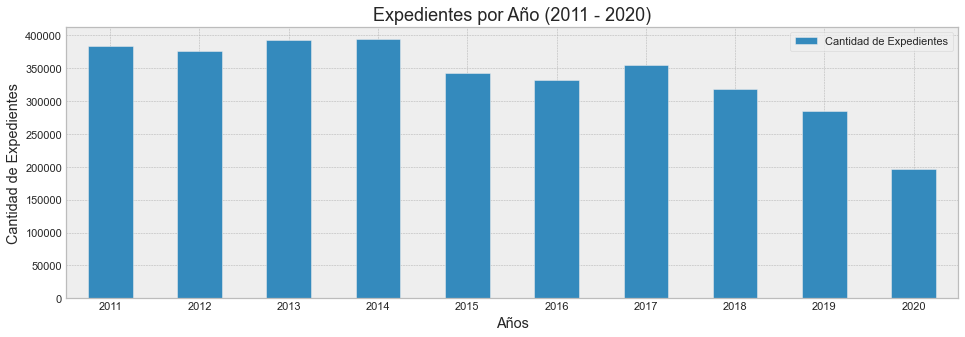

In [14]:
#Grafico la cantidad de expedientes por año
# ==============================================================================
frec_anio = df_expte_sample['Fecha_Ini_Expte'].groupby([df_expte_sample.Fecha_Ini_Expte.dt.year]).agg('count')

frec_anio.plot(kind= "bar", stacked=True, label = "Cantidad de Expedientes")
plt.xticks(rotation=360)
plt.xlabel("Años")

plt.ylabel("Cantidad de Expedientes")

plt.title("Expedientes por Año (2011 - 2020)", fontsize=18);

plt.legend(loc="upper right");

#### Conclusiones
- En este gráfico se puede observar que la cantidad de expediente iniciados comienza a decrecer a partir del año 2018 que es cuando comenzó la implementación de nuevo sistema de expediente (GDE), el cual está reemplazando paulatinamente al Sistema de Expediente SIE
- También se puede observar un descrecimiento mas abrupto en el año 2020, lo que coincide con la llegada del COVID y la consecuente disminución de actividades en todos los sectores

### Gráfico: "Expedientes por Mes (2011 - 2020)"¶

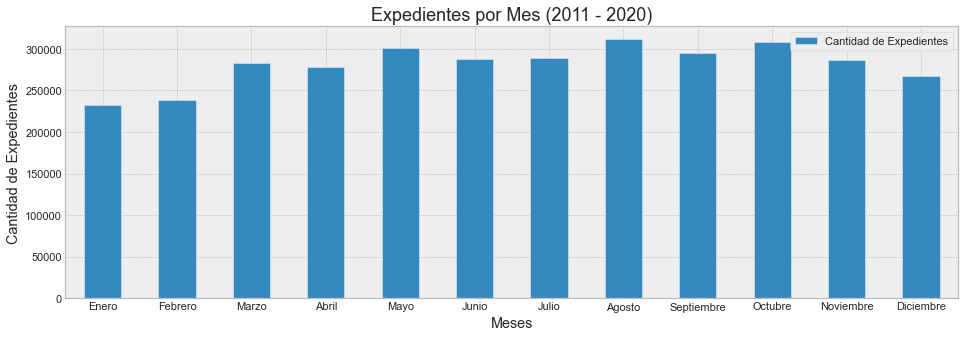

In [15]:
#Grafico la cantidad de expedientes por mes
# ==============================================================================
fig, ax = plt.subplots()        #Creación de una figura con un axis

frec_mes = df_expte_sample['Fecha_Ini_Expte'].groupby([df_expte_sample.Fecha_Ini_Expte.dt.month]).agg('count')

frec_mes.plot(kind= "bar", stacked=True, label = "Cantidad de Expedientes")

plt.xticks(rotation=360)
plt.xlabel("Meses")
plt.title("Expedientes por Mes (2011 - 2020)", fontsize=18)

meses = ('Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre')
ax.set_xticklabels(meses)        #Etiquetas del eje x

plt.ylabel("Cantidad de Expedientes")

plt.legend(loc="upper right");

#### Conclusiones
- En este gráfico se puede observar que la cantidad de expediente iniciados decrece en los meses de vacaciones de verano: diciembre, enero y febrero
- También se observa un descrecimeinto leve en los meses de invierno: junio y julio y en abril que es cuando en general cae Semana Santa

### Gráfico: "Expedientes por día de la Semana (2011 - 2020)"

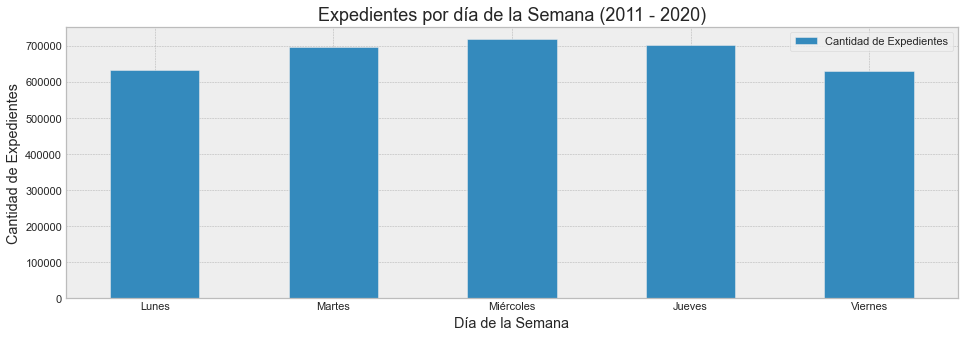

In [16]:
#Grafico la cantidad de expedientes por día de la semana
# ==============================================================================
fig, ax = plt.subplots()        #Creación de una figura con un axis

frec_semana = df_expte_sample['Fecha_Ini_Expte'].groupby([df_expte_sample.Fecha_Ini_Expte.dt.weekday]).agg('count')

frec_semana.plot(kind= "bar", stacked=True, label = "Cantidad de Expedientes")

plt.xticks(rotation=360)
plt.xlabel("Día de la Semana")
plt.xlim(right= 4.5)
plt.title("Expedientes por día de la Semana (2011 - 2020)", fontsize=18)

dia_sem = ('Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sa', 'Do')
ax.set_xticklabels(dia_sem)        #Etiquetas del eje x

plt.ylabel("Cantidad de Expedientes")

plt.legend(loc="upper right");

#### Conclusiones
- En este gráfico se puede observar que la cantidad de expediente iniciados decrece en los días lunes y viernes, lo cual se ajusta a los dichos populares dentro de la adminsitación pública: "Muy lunes" o "Muy viernes"

### Gráfico: "Expedientes por Tipo de Organismo"

Nom_Tipo_Org_Remit
Nom_Tipo_Org_Remit                           
Organismo Externo                        4502
Administración Central                1291619
Organismo Descentralizado             2081366

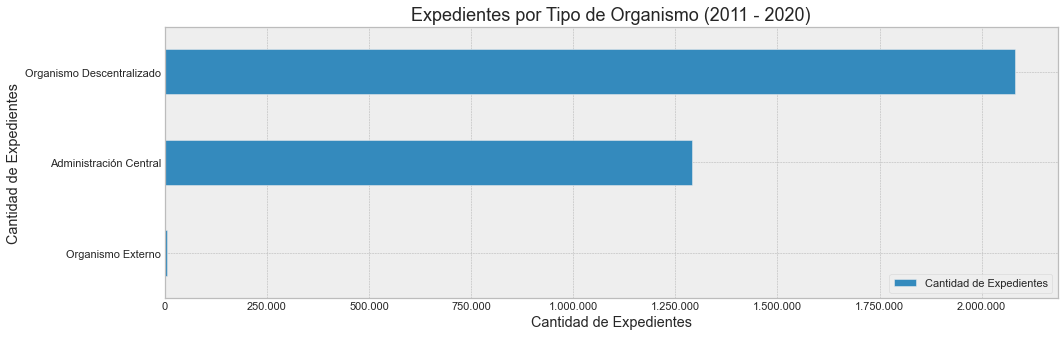

In [17]:
#Grafico la cantidad de expedientes por Tipo de organismo
# ==============================================================================
frec_Tip_Org = df_expte_sample['Nom_Tipo_Org_Remit'].groupby([df_expte_sample.Nom_Tipo_Org_Remit]).agg('count')

frec_Tip_Org = frec_Tip_Org.sort_values(ascending=True)

frec_Tip_Org.plot(kind= "barh", label = "Cantidad de Expedientes")

plt.xticks(rotation=360)
plt.xticks(np.arange(0,2250000, step=250000), ["0", "250.000", "500.000", "750.000", "1.000.000", "1.250.000", "1.500.000", "1.750.000", "2.000.000"])
plt.xlabel("Cantidad de Expedientes")
plt.title("Expedientes por Tipo de Organismo (2011 - 2020)", fontsize=18)

plt.ylabel("Cantidad de Expedientes")

plt.legend(loc="lower right")

frec_Tip_Org = pd.DataFrame(frec_Tip_Org)
frec_Tip_Org.head()

#### Conclusiones
- En este gráfico se puede observar que las oficinas con tipo de Organismo Descentralizado como el IAPOS; API, Catastro, son  las oficinas que más expedientes incian, seguidas por las Oficina de la Adminsitración Central que serían por ejemplo los Miniterios
- Los Tipo de Organismos Externos inician una cantidad muy baja de expedientes

### Gráfico: Top 10 - Expedientes por Organismo (2011 - 2020)

Nom_Tipo_Org_Remit      Org_Remit_Abrev  Cant_Expte
36  Organismo Descentralizado                 SCIT     1049438
32  Organismo Descentralizado                IAPOS      384904
23  Organismo Descentralizado                  API      305630
14     Administración Central       M Trabajo y SS      285087
5      Administración Central          M Educación      162552
4      Administración Central           M Economía      121177
34  Organismo Descentralizado       MOP y Vivienda      118522
25  Organismo Descentralizado          Caja Jubils      113458
22     Administración Central  Tribunal de Cuentas      108774
13     Administración Central          M Seguridad      103099

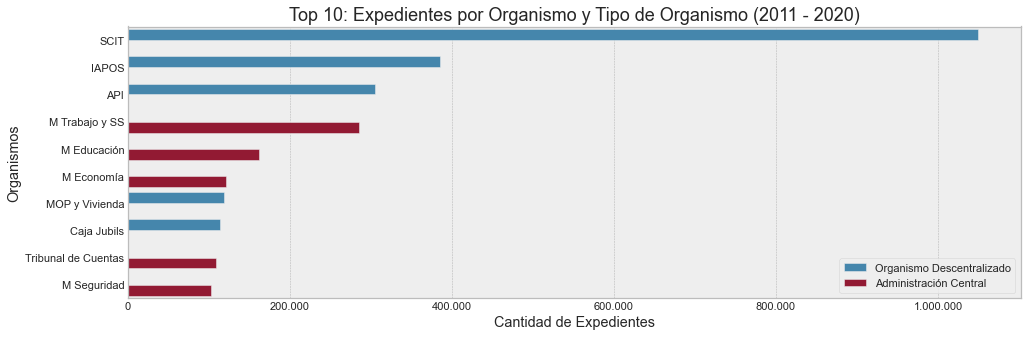

In [18]:
#Grafico el Top 10 de cantidad de expedientes por Organismo
# ==============================================================================
plt.rcParams["figure.figsize"] = 16, 5
frec_Org = df_expte_sample.groupby(by = ['Nom_Tipo_Org_Remit', 'Org_Remit_Abrev'])["Id_Expte"].agg(['count']).reset_index()
frec_Org = frec_Org.rename(columns={'count': 'Cant_Expte'})
frec_Org = frec_Org.sort_values(by = ['Cant_Expte'], ascending=False).head(10)

sns.barplot(x="Cant_Expte", y="Org_Remit_Abrev", hue="Nom_Tipo_Org_Remit", data=frec_Org)

#plt.Axes.barh(width = 0.8)
#plt.barh(y = "Nom_Org_Remit", width = 1, height = 1, left=100, align='edge')

plt.title("Top 10: Expedientes por Organismo y Tipo de Organismo (2011 - 2020)", fontsize=18)

plt.xlabel("Cantidad de Expedientes")
plt.xticks(np.arange(0,1100000, step=200000), ["0", "200.000", "400.000", "600.000", "800.000", "1.000.000"])

#plt.yticks(frec_Org.Nom_Org_Remit, ["SCIT", "IAPOS", "API", "Ministerio de Trabajo", "Ministerio de Educación", "Ministerio de Economía", "Ministerio de Obras Públicas", "Caja de Jubilaciones", "Tribunal de Cuentas", "Ministerio de Seguridad"])

#ax.ticklabel_format(style='plain')

#ax.set_yticklabels(labels = frec_Org["Nom_Org_Remit"], minor=True)

#ax.ticklabel_format(useOffset=False, style='plain')
#ax.xaxis.set_major_formatter(ScalarFormatter(useOffset=True))
#ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y')) 

plt.ylabel("Organismos")

plt.legend(loc="lower right")

frec_Org.head(10)

### Gráfico: Top 10 - Expedientes por Organismo (2011 - 2020) - Usando Altair

In [19]:
dom = ['Organismo Descentralizado', 'Administración Central']
rng = ['steelblue', 'darkred']
alt.Chart(frec_Org).mark_bar().encode(
    x=alt.X('Cant_Expte', title='Cantidad de Expedientes'),
   y=alt.Y('Org_Remit_Abrev', title='Organismos', sort=alt.EncodingSortField(field='Org_Remit_Abrev', op='count', order='ascending')),
    color=alt.Color('Nom_Tipo_Org_Remit', scale=alt.Scale(domain=dom, range=rng), title='Tipo de Organismo'),
).properties(
    width=600,
    height=250,
    title='Top 10: Expedientes por Organismo y Tipo de Organismo (2011 - 2020)',
    background='whitesmoke'
)

alt.Chart(...)

#### Conclusiones
- En este gráfico se puede observar que la oficina de Catastro (SCIT) inicia más expedientes que cualquier otra oficina, muchos más incluso que el IAPOS, lo cual llama la antención ya que en una Obra Social se supone se deberían generar más expedientes que en el SCIT
- Habría que investigar un poco esta situación. Quizás hay algún trámite que se inicia como expediente, el cual podría normalizarse y realizarse como trámite admisnitrativo

### Gráfico: "Top 10: Expedientes por Tema (2011 - 2020)"

Org_Remit_Abrev                                          Nom_Tema  \
6926            SCIT              CERTIFICADO CATASTRAL - PLAZO NORMAL   
1337           IAPOS                   FACTURACION PRESTACIONES MES...   
6989            SCIT                  INSCRIPCION DE PLANOS DE MENSURA   
2453      M Economía                              PUBLICIDAD: CAMPA#AS   
5796  M Trabajo y SS                               SOLICITA INSPECCION   
295              API                                      TEMAS VARIOS   
7118            SCIT  SUBPARCELAMIENTO DE PLANOS DE MENSURA INSCRIPTOS   
1398           IAPOS                      PRESTADORES POR DISCAPACIDAD   
1444           IAPOS                           SERVICIO COMPLEMENTARIO   
7106            SCIT                           SI REGISTRA PROPIEDADES   

      Cant_Expte  
6926      528993  
1337      108079  
6989       83345  
2453       74502  
5796       73955  
295        71230  
7118       71021  
1398       65701  
1444       62001  
7106       61031

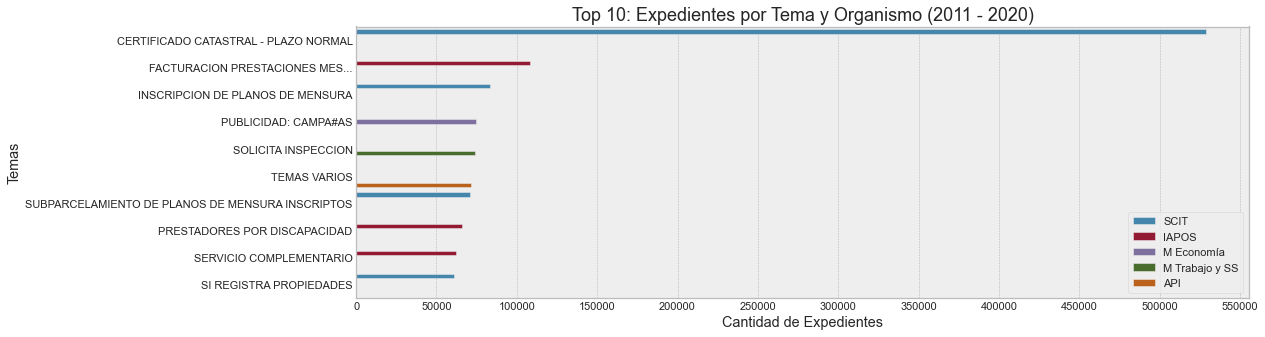

In [20]:
# Grafico la cantidad de expediente por tema
#================================================================
frec_Tem = df_expte_sample.groupby(by = ['Org_Remit_Abrev', 'Nom_Tema'])["Id_Expte"].agg(['count']).reset_index()
frec_Tem = frec_Tem.rename(columns={'count': 'Cant_Expte'})
frec_Tem = frec_Tem.sort_values(by = ['Cant_Expte'], ascending=False).head(10)

sns.barplot(x="Cant_Expte", y="Nom_Tema", hue="Org_Remit_Abrev", data=frec_Tem)

plt.title("Top 10: Expedientes por Tema y Organismo (2011 - 2020)", fontsize=18)

plt.xlabel("Cantidad de Expedientes")
plt.xticks(np.arange(0,600000, step=50000))

plt.ylabel("Temas")

plt.legend(loc="lower right")

frec_Tem.head(10)

### Gráfico: "Top 10: Expedientes por Tema (2011 - 2020)" - Usando Altair

In [47]:
dom = ['SCIT', 'IAPOS', 'M Economía', 'M Trabajo y SS', 'API']
rng = ['steelblue', 'darkred', 'purple', 'forestgreen', 'chocolate']
alt.Chart(frec_Tem).mark_bar().encode(
    x=alt.X('Cant_Expte', title='Cantidad de Expedientes'),
    y=alt.Y('Nom_Tema', title='Temas', sort=alt.EncodingSortField(field='Nom_Tema', op='count', order='ascending')),
    color=alt.Color('Org_Remit_Abrev', scale=alt.Scale(domain=dom, range=rng), title='Organismo'),
).properties(
    width=650,
    height=250,
    title='Top 10: Expedientes por Tema (2011 - 2020)',
    background='whitesmoke'
)

alt.Chart(...)

#### Conclusiones
- En este gráfico se puede observar que se inican muchos más expediente con el tema " Certificado Castastral - Plazo Norma", el cual podemos ver por el nombre del tema que petenece a la oficina de Castro (SCIT)
- Se podría evaluar la posibilidad de ingresar este tipo de trámite como trámite administrativo, en lugar de hacerlo con el sistema de expediente, ya que es un trámite por lo visto muy utilizado
- Se podría realizar la evaluación anterior para el resto de los procesos de los expdientes por tema de este gráfico 

### Gráfico: Expedientes con más de 500 hojas por Tipo de Organismo (2011 - 2020)

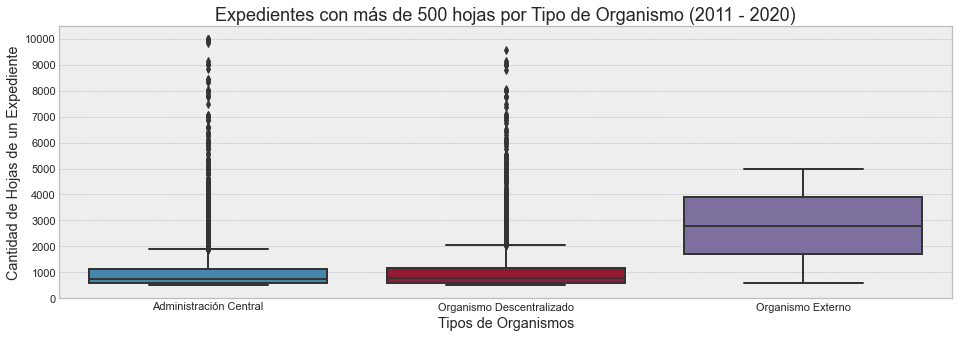

In [22]:
#Grafico Cantidad de hojas por Tipo de Organismo
#==================================================
df_exp_grandes = df_expte_sample[df_expte_sample['Cant_Hojas'] >= 500]        #Tipo de Organismo: Organismo Descentralizado
df_exp_grandes = df_exp_grandes.sort_values(by = ['Cant_Hojas', 'Nom_Tipo_Org_Remit'])

sns.boxplot(x="Nom_Tipo_Org_Remit", y="Cant_Hojas", data=df_exp_grandes)
plt.xticks(rotation=360)

plt.title("Expedientes con más de 500 hojas por Tipo de Organismo (2011 - 2020)", fontsize=18)

plt.xlabel("Tipos de Organismos")

plt.yticks(np.arange(0,11000, step=1000))
plt.ylabel("Cantidad de Hojas de un Expediente");

#### Conclusiones
- En este gráfico podemos ver, tendiendo en cuenta los gráficos anteriores, que si bien las oficinas que pertenecen a los Tipos de Organismos: Organismo Descentralizado y Adminsitración Central, generan muchos más expedientes que las que pertenecen al tipo de Organismo: Organismo Externo; los expedentes de estos últimos en general son mas grandes, es decir tienen mas hojas

In [95]:
#Tam_Expte.head()

Cant_Hojas  Cant_Expte
0           1      251895
1           2      399889
2           3      436033
3           4      153465
4           5      138079

In [94]:
#Tam_Expte = df_expte_sample.groupby(by = ['Cant_Hojas'])["Id_Expte"].agg(['count']).reset_index()
#Tam_Expte = Tam_Expte.rename(columns={'count': 'Cant_Expte'})

In [109]:
df_expte_red = df_expte_sample[df_expte_sample['Cant_Hojas'] >= 100]    
df_expte_red =  df_expte_red.sample(frac=0.035, random_state=9)
df_expte_red.count()

Fecha_Ini_Expte           4936
Id_Expte                  4936
Id_Fecha_Ini_Expte        4936
Id_Fecha_Ult_Mov_Expte    4936
Fecha_Ult_Mov_Expte       4936
Id_Oficina_Remitente      4936
Id_Tipo_Org_Remit         4936
Nom_Tipo_Org_Remit        4936
Id_Org_Remit              4936
Nom_Org_Remit             4936
Id_Oficina_Destino        4936
Id_Tipo_Org_Destino       4936
Nom_Tipo_Org_Destino      4936
Id_Org_Destino            4936
Nom_Org_Destino           4936
Id_Tema                   4936
Nom_Tema                  4936
Concludio                 4936
Cant_Hojas                4936
Anio_Ini                  4936
Mes_Ini                   4936
Anio_Mes_Ini              4936
Cant_Dias                 4936
Org_Remit_Abrev           4936
dtype: int64

In [110]:
#background='whitesmoke'

dom = ['Administración Central', 'Organismo Descentralizado', 'Organismo Externo']
rng = ['lightcoral', 'skyblue', 'olivedrab']

alt.data_transformers.disable_max_rows()
brush = alt.selection(type='interval')

base = alt.Chart(df_expte_red)

points = base.mark_point().encode(
    x=alt.X('Cant_Dias:Q', title='Cantidad de Expedientes'),
    y= alt.Y('Cant_Hojas:Q', title = 'Cantidad de Hojas'),
    color=alt.condition(brush, 'Nom_Tipo_Org_Remit:N', 
                        alt.value('lightgray'), 
                        scale=alt.Scale(domain=dom, range=rng), 
                        title='Tipo de Organismo'),
).properties(width=650, height=250,title='Tamaño vs Cantidad de Expedientes por Tipo de Organismo').add_selection(brush)
#.interactive()    

bars = base.mark_bar().encode(
    y=alt.X('Nom_Tipo_Org_Remit:N', title='Tipo de Organismo'),
    x=alt.Y('count(Nom_Tipo_Org_Remit):Q', title='Cantidad de Expedientes'),
    color='Nom_Tipo_Org_Remit:N',
    ).properties(width=650, height=80).transform_filter(brush)

points & bars

alt.VConcatChart(...)

___
## Agrupación de todos los Expedientes por Semana

In [77]:
df_date = df_expte_sample.Fecha_Ini_Expte.reset_index() 
df_date = df_date.set_index(['Fecha_Ini_Expte'])
df_Week = df_date.resample('W').count()
df_Week = df_Week.rename(columns={'index': 'Cant_Expte'})
df_Week.head()

Cant_Expte
Fecha_Ini_Expte            
2011-01-02                2
2011-01-09             6453
2011-01-16             5768
2011-01-23             4948
2011-01-30             4917

In [79]:
# Borro el primer y último registros porque no corresponden
#==================================================================
df_Week = df_Week.loc['2011-01-09':'2020-12-27'].reset_index()
df_Week = df_Week.set_index(['Fecha_Ini_Expte'])
df_Week.head()

Cant_Expte
Fecha_Ini_Expte            
2011-01-09             6453
2011-01-16             5768
2011-01-23             4948
2011-01-30             4917
2011-02-06             6222

In [80]:
df_Week.tail()

Cant_Expte
Fecha_Ini_Expte            
2020-11-29             3706
2020-12-06             4379
2020-12-13             3773
2020-12-20             5874
2020-12-27             3241

In [81]:
df_Week.count()

Cant_Expte    521
dtype: int64

In [82]:
#Guardar expedientes por semana para usarlo en futoros análisis
#==================================================================
df_Week.to_csv('df_Week.csv', sep=';')

## Agrupación de Expedientes 2021 por Semana

In [ ]:
#df_expte = df_expte.set_index(['Fecha_Ini_Expte'])
df_expte2021 = df_expte.loc['2021-01-01':'2021-08-04'].reset_index()

In [83]:
df_date_2021 = df_expte2021.Fecha_Ini_Expte.reset_index() 
df_date_2021 = df_date_2021.set_index(['Fecha_Ini_Expte'])
df_Week_2021 = df_date_2021.resample('W').count()
df_Week_2021 = df_Week_2021.rename(columns={'index': 'Cant_Expte'})
df_Week_2021.head()

Cant_Expte
Fecha_Ini_Expte            
2021-01-03                3
2021-01-10             5063
2021-01-17             4987
2021-01-24             4196
2021-01-31             4123

In [84]:
df_Week_2021.tail()

Cant_Expte
Fecha_Ini_Expte            
2021-07-11             4779
2021-07-18             5734
2021-07-25             4588
2021-08-01             5096
2021-08-08             3333

In [85]:
# Borro el primer y último registros porque no corresponden
#==================================================================
df_Week_2021 = df_Week_2021.loc['2021-01-10':'2021-08-08'].reset_index()
df_Week_2021 = df_Week_2021.set_index(['Fecha_Ini_Expte'])
df_Week_2021.head()

Cant_Expte
Fecha_Ini_Expte            
2021-01-10             5063
2021-01-17             4987
2021-01-24             4196
2021-01-31             4123
2021-02-07             4267

In [86]:
df_Week_2021.tail()

Cant_Expte
Fecha_Ini_Expte            
2021-07-11             4779
2021-07-18             5734
2021-07-25             4588
2021-08-01             5096
2021-08-08             3333

In [87]:
#Guardar expedientes 2021 por semana para usarlo en futoros análisis
#==================================================================
df_Week_2021.to_csv('df_Week_2021.csv', sep=';')

___
## Agrupación de todos los Expedientes por Mes/Año

In [53]:
#Agrupo la cantidad de expediente iniciados por año y mes
#==============================================================================
df_Mes_Anio = df_expte_sample.groupby("Anio_Mes_Ini")["Id_Expte"].agg(['count']).reset_index()
df_Mes_Anio = df_Mes_Anio.rename(columns={'count': 'Cant_Expte'})

In [54]:
#Agrupo expedientes por mes y año y tipo de organismo
#=============================================================================================
df_Mes_Anio_Tipo_Org = df_expte_sample.groupby(by = ["Anio_Mes_Ini", 'Nom_Tipo_Org_Remit'])["Id_Expte"].agg(['count']).reset_index()
df_Mes_Anio_Tipo_Org = df_Mes_Anio_Tipo_Org.rename(columns={'count': 'Cant_Expte'})

df_OD = df_Mes_Anio_Tipo_Org[df_Mes_Anio_Tipo_Org['Nom_Tipo_Org_Remit'] == "Organismo Descentralizado"] #Tipo de Organismo: Organismo Descentralizado
df_AC = df_Mes_Anio_Tipo_Org[df_Mes_Anio_Tipo_Org['Nom_Tipo_Org_Remit'] == "Administración Central"]    #Tipo de Organismo: Administración Central
df_OE = df_Mes_Anio_Tipo_Org[df_Mes_Anio_Tipo_Org['Nom_Tipo_Org_Remit'] == "Organismo Externo"]         #Tipo de Organismo: Organismo Externo

#Preparo los datset auxiliares (valores de x) para graficar
#========================================================================
x = df_Mes_Anio["Anio_Mes_Ini"]

In [31]:
df_OE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 2 to 358
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Anio_Mes_Ini        119 non-null    datetime64[ns]
 1   Nom_Tipo_Org_Remit  119 non-null    object        
 2   Cant_Expte          119 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 3.7+ KB


In [55]:
#Buscar valores que no se encuentran en la agrupación "Organismos descentralizados"
#====================================================================
#x1 = df_OD["Anio_Mes_Ini"]
#x2 = df_OE["Anio_Mes_Ini"]
#filtered_df = x1[~x1.isin(x2)].reset_index()
#filtered_df

#Visualizo la cantidad de expedientes para el mes anterior al cual tengo que rellenar el valor, sería "2020-04"
#df_OE.tail(10)

#Agrego registro faltante con los valores correcpondientes
df_OE=df_OE.append({'Anio_Mes_Ini' :'2020-04-01 00:00:00', 'Nom_Tipo_Org_Remit' : 'Organismo Externo', 'Cant_Expte' : 1}, ignore_index=True)
#df_OE.head(120)

df_OE['Anio_Mes_Ini'] = pd.to_datetime(df_OE['Anio_Mes_Ini'])
df_OE.tail(10)

Anio_Mes_Ini Nom_Tipo_Org_Remit  Cant_Expte
110   2020-03-01  Organismo Externo          22
111   2020-05-01  Organismo Externo           1
112   2020-06-01  Organismo Externo           4
113   2020-07-01  Organismo Externo          35
114   2020-08-01  Organismo Externo          26
115   2020-09-01  Organismo Externo          13
116   2020-10-01  Organismo Externo          23
117   2020-11-01  Organismo Externo          14
118   2020-12-01  Organismo Externo          11
119   2020-04-01  Organismo Externo           1

In [56]:
# Genero un índice con la fecha y lo ordeno
#==================================================================
#df_OE.set_index("Anio_Mes_Ini", inplace=True)
df_OE = df_OE.sort_index(ascending = True)
df_OE.tail(10)

Anio_Mes_Ini Nom_Tipo_Org_Remit  Cant_Expte
110   2020-03-01  Organismo Externo          22
111   2020-05-01  Organismo Externo           1
112   2020-06-01  Organismo Externo           4
113   2020-07-01  Organismo Externo          35
114   2020-08-01  Organismo Externo          26
115   2020-09-01  Organismo Externo          13
116   2020-10-01  Organismo Externo          23
117   2020-11-01  Organismo Externo          14
118   2020-12-01  Organismo Externo          11
119   2020-04-01  Organismo Externo           1

In [57]:
#Preparo los datset auxiliares (valores de y) para graficar
#========================================================================
data = df_Mes_Anio["Cant_Expte"]
data_OD = df_OD["Cant_Expte"]
data_AC = df_AC["Cant_Expte"]
data_OE = df_OE["Cant_Expte"]

In [24]:
#Pongo la columna de fecha de inicio de expediente como ínidice (solo debo ejecurtarlo una vez, sino dá error)
#=======================================================================
#df_expte_sample.set_index("Anio_Mes_Ini", inplace = True)
#df_expte_sample.head(3)

########################################## Para completar la frecuencia de una columna de fecha (no funciona)###################################################
#===================================================================
#df_OE.set_index("Anio_Mes_Ini", inplace = True)
#df_OE = df_OE.asfreq("BM")
#df_OE.head()

### Gráfico: "Expedientes por mes y año (2011 - 2020)"

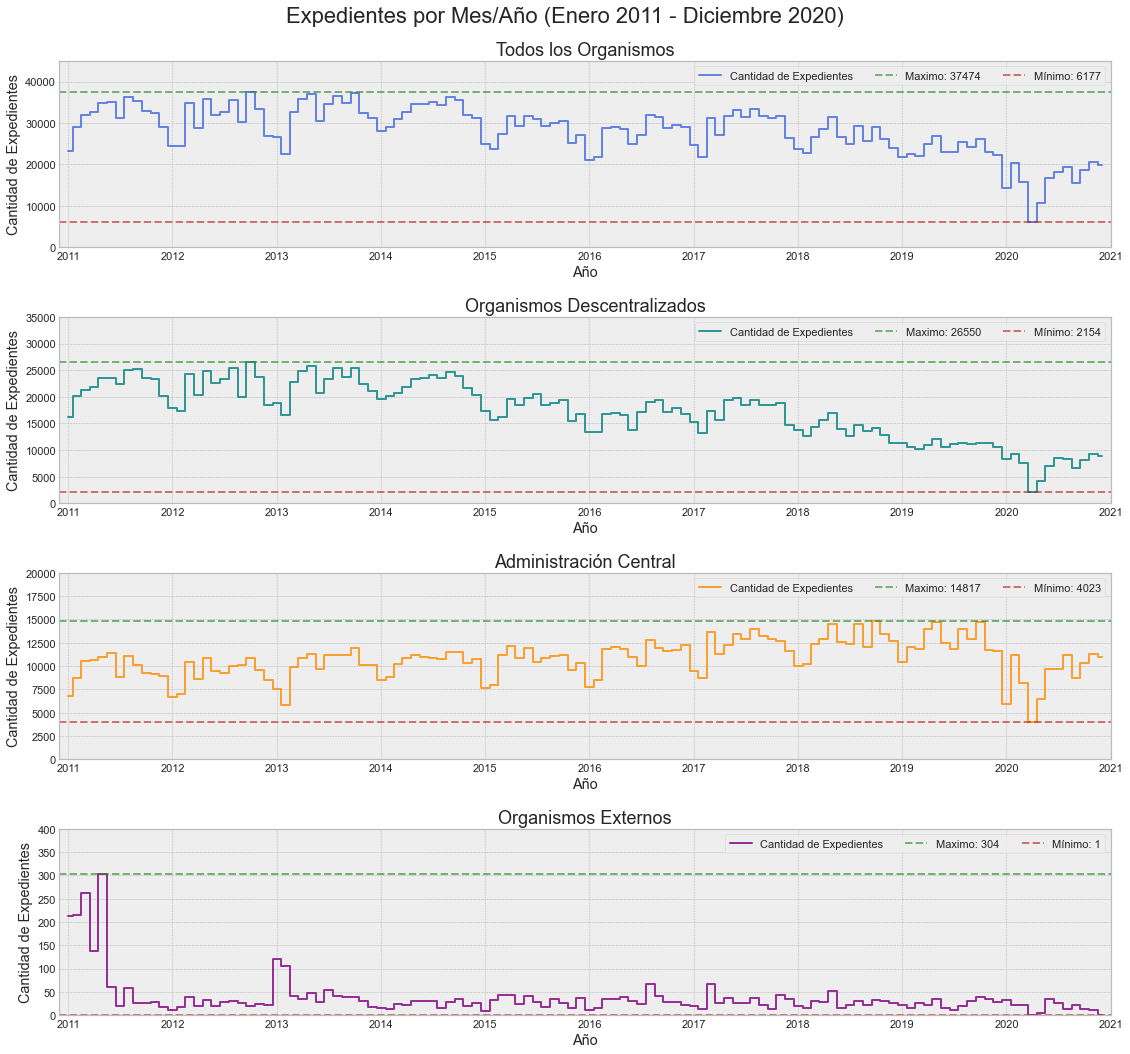

In [58]:
#Grafico la cantidad de expedientes por mes, año y tipo de organismo
# ====================================================================================
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(16, 15), sharex=False)        #Creación de una figura con axis

# Primer Subplot - Expedientes por mes y año para todos los Organismos
# ==============================================================================
ax = axes[0]
ax.step(x, data, where='mid', color="royalblue", alpha=0.8, label = "Cantidad de Expedientes")

ax.axhline(data.max(), color="forestgreen", linestyle="--", linewidth=2, alpha=0.6, label=f"Maximo: {data.max():.0f}")  # Se Muestra el máximo
ax.axhline(data.min(), color="firebrick", linestyle="--", linewidth=2, alpha=0.6, label=f"Mínimo: {data.min():.0f}")    # Se Muestra el mínimo

ax.set_xlabel("Año")
ax.set_xlim([dt.date(2010, 12, 1), dt.date(2021, 1, 1)])

ax.set_ylabel("Cantidad de Expedientes")
ax.set_ylim(bottom=0, top=45000)

ax.set_title("Todos los Organismos", fontsize=18)

ax.legend(loc="upper right", ncol=3)


# Segundo Subplot - Expedientes por mes y año para Tipo de Organismo: Organismo Descentralizado
#=======================================================================
ax = axes[1]
ax.step(x, data_OD, where='mid', color="teal", alpha=0.8, label="Cantidad de Expedientes")

ax.axhline(data_OD.max(), color="forestgreen", linestyle="--", linewidth=2, alpha=0.6, label=f"Maximo: {data_OD.max():.0f}")  # Se Muestra el máximo
ax.axhline(data_OD.min(), color="firebrick", linestyle="--", linewidth=2, alpha=0.6, label=f"Mínimo: {data_OD.min():.0f}")    # Se Muestra el mínimo

ax.set_xlabel("Año")
ax.set_xlim([dt.date(2010, 12, 1), dt.date(2021, 1, 1)])

ax.set_ylabel("Cantidad de Expedientes")
ax.set_ylim(bottom=0, top=35000)

ax.set_title("Organismos Descentralizados", fontsize=18)    
ax.legend(loc="upper right", ncol=3)


# Tercer Subplot - Expedientes por mes y año para Tipo de Organismo: Adminsitración Central
#=======================================================================
ax = axes[2]
ax.step(x, data_AC, where='mid', color="darkorange", alpha=0.8, label="Cantidad de Expedientes")

ax.axhline(data_AC.max(), color="forestgreen", linestyle="--", linewidth=2, alpha=0.6, label=f"Maximo: {data_AC.max():.0f}")  # Se Muestra el máximo
ax.axhline(data_AC.min(), color="firebrick", linestyle="--", linewidth=2, alpha=0.6, label=f"Mínimo: {data_AC.min():.0f}")    # Se Muestra el mínimo

ax.set_xlabel("Año")
ax.set_xlim([dt.date(2010, 12, 1), dt.date(2021, 1, 1)])

ax.set_ylabel("Cantidad de Expedientes")
ax.set_ylim(bottom=0, top=20000)

ax.set_title("Administración Central", fontsize=18)    
ax.legend(loc="upper right", ncol=3)


# Cuarto Subplot - Expedientes por mes y año para Tipo de Organismo: Organismo Externos
#=======================================================================
ax = axes[3]
ax.step(x, data_OE, where='mid', color="purple", alpha=0.8, label="Cantidad de Expedientes")

ax.axhline(data_OE.max(), color="forestgreen", linestyle="--", linewidth=2, alpha=0.6, label=f"Maximo: {data_OE.max():.0f}")  # Se Muestra el máximo
ax.axhline(data_OE.min(), color="firebrick", linestyle="--", linewidth=2, alpha=0.6, label=f"Mínimo: {data_OE.min():.0f}")    # Se Muestra el mínimo

ax.set_xlabel("Año")
ax.set_xlim([dt.date(2010, 12, 1), dt.date(2021, 1, 1)])

ax.set_ylabel("Cantidad de Expedientes")
ax.set_ylim(bottom=0, top=400)

ax.set_title("Organismos Externos", fontsize=18)    
ax.legend(loc="upper right", ncol=3)


# Configuración Global
#==========================================================================================================
#ax.set_xlabel("Año")
#ax.set_xlim([dt.date(2010, 12, 1), dt.date(2021, 1, 1)])

#plt.FixedLocator(mdates.YearLocator())
ax.xaxis.set_major_locator(mdates.YearLocator())                #Obtiene el año para mostrar en el eje x
#plt.FixedFormatter(mdates.DateFormatter('%m-%Y'))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))     #Formato de fecha del eje x

#ax.set_xticks(rotation=360)


plt.suptitle("Expedientes por Mes/Año (Enero 2011 - Diciembre 2020)", fontsize=22)    # Se añade un título global
plt.tight_layout(pad=1.5);                                                                    # Se ajusta el espaciado

#### Conclusiones
- En todos los gráficos podemos observar:
  - Que hay un comportamiento estacionario en la serie de tiempo. Es decir en cada año el comportamiento de la cantidad de expedientes es similar al año anterior y al siguiente
  - La cantidad de expedientes iniciados en los meses de vaciones (diciembre, enero, febrero) decrece
  - En el año 2020, hay un decrecimiento abrupto lo cual coincide con la llegada del COVID y la consecuente disminución de actividades en todos los sectores
>
- En el 1° gráfico: podemos observar:
   - A a partir del año 2018 hay una tendencia de descrecimiento de la cantidad de expedientes iniciados que es cuando comenzó la implementación de nuevo sistema de expediente (GDE), el cual está reemplazando paulatinamente al Sistema de Expediente SIE.
>
- En el  2° gráfico: "Organismo Descentralizo", podemos observar:
  - Tiene un comportamiento similar al gráfico anterior, esto se debe a que este tipo de organismo es el que más cantidad de expedientes inicia, entonces es el que más influye en el gráfico general
>
- En el  3° gráfico: podemos observar:
  - A partir del año 2016 hay una tendencia de crecimiento de la cantidad de expedientes iniciados hasta el 2019 inclusive
>
- En el  4° gráfico: podemos observar:
  - Se generan muchos menos expedientes que en las oficinas de los otros dos tipos de Organismos

___
## Agrupación de todos los Expedientes por Dia/Mes/Año

In [89]:
#Agrupo la cantidad de expediente iniciados por dia, mes y año
#==========================================================================
df_Fecha_Ini = df_expte_sample.groupby("Fecha_Ini_Expte")["Id_Expte"].agg(['count']).reset_index()
df_Fecha_Ini = df_Fecha_Ini.rename(columns={'count': 'Cant_Expte'})

In [31]:
df_Fecha_Ini.head()

Fecha_Ini_Expte  Cant_Expte
0      2011-01-02           2
1      2011-01-03        1144
2      2011-01-04        1217
3      2011-01-05        1326
4      2011-01-06        1377

In [81]:
df_Fecha_Ini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651 entries, 0 to 2650
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Fecha_Ini_Expte  2651 non-null   datetime64[ns]
 1   Cant_Expte       2651 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 41.5 KB


In [90]:
# Genero un índice con la fecha
#==================================================================
df_Fecha_Ini.set_index("Fecha_Ini_Expte", inplace=True)
df_Fecha_Ini.head()

Cant_Expte
Fecha_Ini_Expte            
2011-01-02                2
2011-01-03             1144
2011-01-04             1217
2011-01-05             1326
2011-01-06             1377

In [91]:
# Relleno las fechas faltante para que la frecuencia de la seria sea siemrpe la misma. 
#==================================================================
#Uso el parámetro "b" como freq que son los "business day", así no tiene en cuenta las sábado y domingos
#Tendría que quitar las feriados de cada año para Santa Fe

df_Fecha_Ini = df_Fecha_Ini.asfreq(freq = 'b')

In [140]:
df_Fecha_Ini.count()

Cant_Expte    2468
dtype: int64

In [40]:
# Verifico si hay fechas que tengan valores nulos en la cantidad de expedientes
#============================================================
df_Fecha_Ini.isna().sum()

Cant_Expte    140
dtype: int64

In [92]:
# Relleno los nulos en el campo "cantidad de expedientes, con el valor del registro de la fecha anterior"
#============================================================================================
df_Fecha_Ini.Cant_Expte = df_Fecha_Ini.Cant_Expte.fillna(method='bfill')

#Luego verifico que no haya mas nulos ejecutando la celda anterior

In [93]:
# Elimina el índice del dataset, para luego poder seprar los datos y graficar
#======================================================================
df_Fecha_Ini = df_Fecha_Ini.reset_index()
df_Fecha_Ini.head()

Fecha_Ini_Expte  Cant_Expte
0      2011-01-03      1144.0
1      2011-01-04      1217.0
2      2011-01-05      1326.0
3      2011-01-06      1377.0
4      2011-01-07      1388.0

In [94]:
# Prepara los datos del dataframe (valores de x e y) con todos los expediente para poder graficar
#==========================================================================
x_d = df_Fecha_Ini["Fecha_Ini_Expte"]
data_d = df_Fecha_Ini["Cant_Expte"]

___
## Agrupación de Expedientes por Organismo 

In [95]:
#Agrupo expedientes por dia, mes y año y tipo de organismo
#=============================================================================================
df_Fecha_Ini_Tipo_Org = df_expte_sample.groupby(by = ["Fecha_Ini_Expte", 'Nom_Tipo_Org_Remit'])["Id_Expte"].agg(['count']).reset_index()
df_Fecha_Ini_Tipo_Org = df_Fecha_Ini_Tipo_Org.rename(columns={'count': 'Cant_Expte'})

df_OD_d = df_Fecha_Ini_Tipo_Org[df_Fecha_Ini_Tipo_Org['Nom_Tipo_Org_Remit'] == "Organismo Descentralizado"] #Tipo de Organismo: Organismo Descentralizado
df_AC_d = df_Fecha_Ini_Tipo_Org[df_Fecha_Ini_Tipo_Org['Nom_Tipo_Org_Remit'] == "Administración Central"]    #Tipo de Organismo: Administración Central
df_OE_d = df_Fecha_Ini_Tipo_Org[df_Fecha_Ini_Tipo_Org['Nom_Tipo_Org_Remit'] == "Organismo Externo"]         #Tipo de Organismo: Organismo Externo

### Para cada Dataframe de cada Organismo

In [96]:
# Elimino la columna Tipo de Organismo de cada datafame, porque ya están dividido por Tipo de Organismo
#==========================================================
df_OD_d = df_OD_d.drop(['Nom_Tipo_Org_Remit'], axis=1)
df_AC_d = df_AC_d.drop(['Nom_Tipo_Org_Remit'], axis=1)
df_OE_d = df_OE_d.drop(['Nom_Tipo_Org_Remit'], axis=1)

In [97]:
# Genero un índice con la fecha
#==================================================================
df_OD_d.set_index("Fecha_Ini_Expte", inplace=True)
df_AC_d.set_index("Fecha_Ini_Expte", inplace=True)
df_OE_d.set_index("Fecha_Ini_Expte", inplace=True)

In [98]:
# Relleno las fechas faltantes para que la frecuencia de la serie sea siempre la misma. 
#==================================================================
#Uso el parámetro "b" como freq que son los "business day", así no tiene en cuenta las sábado y domingos
#Tendría que quitar las feriados de cada año para Santa Fe

df_OD_d = df_OD_d.asfreq(freq = 'b')
df_AC_d = df_AC_d.asfreq(freq = 'b')
df_OE_d = df_OE_d.asfreq(freq = 'b')
df_OE_d.head()

Cant_Expte
Fecha_Ini_Expte            
2011-01-03             21.0
2011-01-04              3.0
2011-01-05             21.0
2011-01-06             27.0
2011-01-07             26.0

#### Para cada tipo de Organismo, verifico si hay fechas que tienen valores nulos en la cantidad de expedientes

In [50]:
df_OD_d.isna().sum()

Cant_Expte    173
dtype: int64

In [51]:
df_AC_d.isna().sum()

Cant_Expte    143
dtype: int64

In [52]:
df_OE_d.isna().sum()

Cant_Expte    1080
dtype: int64

In [99]:
# Relleno los nulos en el campo "cantidad de expedientes, con el valor del registro de la fecha anterior"
#============================================================================================
df_OD_d.Cant_Expte = df_OD_d.Cant_Expte.fillna(method='bfill')
df_AC_d.Cant_Expte = df_AC_d.Cant_Expte.fillna(method='bfill')
df_OE_d.Cant_Expte = df_OE_d.Cant_Expte.fillna(method='bfill')

#Luego verifico que no haya mas nulos ejecutando las tres celdas anteriores

#### Cuento la cantidad de filas para cada dataframe, para verificar que tengan las mismas fechas

In [54]:
df_OD_d.count()

Cant_Expte    2608
dtype: int64

In [55]:
df_AC_d.count()

Cant_Expte    2608
dtype: int64

In [63]:
df_OE_d.count()

Cant_Expte    2608
dtype: int64

In [100]:
# Elimino el índice de cada dataset, para luego poder seprar los datos y graficar
#======================================================================
df_OD_d = df_OD_d.reset_index()
df_AC_d = df_AC_d.reset_index()
df_OE_d = df_OE_d.reset_index()

In [101]:
#Buscar valores que no se encuentran en la agrupación "Organismos descentralizados y agregarla a dicho data set"
#====================================================================
x1_d = df_AC_d["Fecha_Ini_Expte"]
x2_d= df_OE_d["Fecha_Ini_Expte"]
filtered_df = x1_d[~x1_d.isin(x2_d)].reset_index()
filtered_df

index Fecha_Ini_Expte
0   2606      2020-12-29
1   2607      2020-12-30

In [102]:
# Agrego al dataset "df_OE_d" los registros que faltan
#===============================================================================
df_OE_d = pd.merge(filtered_df, df_OE_d, on="Fecha_Ini_Expte", how= 'outer')

#Elimino la columna "index" que vino del dataset filtrado
#===================================================================
df_OE_d = df_OE_d.drop(['index'], axis=1)
df_OE_d.head()

Fecha_Ini_Expte  Cant_Expte
0      2020-12-29         NaN
1      2020-12-30         NaN
2      2011-01-03        21.0
3      2011-01-04         3.0
4      2011-01-05        21.0

#### Vuelvo a rellenar los nulos (para los registros agregados) en el campo "cantidad de expedientes, con el valor del registro de la fecha posterior"

In [103]:
# Genero un índice con la fecha y lo ordeno
#==================================================================
df_OE_d.set_index("Fecha_Ini_Expte", inplace=True)
df_OE_d = df_OE_d.sort_index(ascending = True)

# Vuevlo a rellenar los nulos (para los registros agregados) en el campo "cantidad de expedientes, con el valor del registro de la fecha posterior"
#============================================================================================
df_OE_d.Cant_Expte = df_OE_d.Cant_Expte.fillna(method='ffill')

In [61]:
df_OE_d.isna().sum()

Cant_Expte    0
dtype: int64

In [62]:
df_OE_d.tail()

Cant_Expte
Fecha_Ini_Expte            
2020-12-24              2.0
2020-12-25              2.0
2020-12-28              2.0
2020-12-29              2.0
2020-12-30              2.0

In [104]:
#Preparo los datset auxiliares de cada organismo (valores de y) para graficar
#========================================================================
data_OD_d = df_OD_d["Cant_Expte"]
data_AC_d = df_AC_d["Cant_Expte"]
data_OE_d = df_OE_d["Cant_Expte"]


### Gráfico: Expedientes por dia/mes/año para todos los Organismos y por Organismo

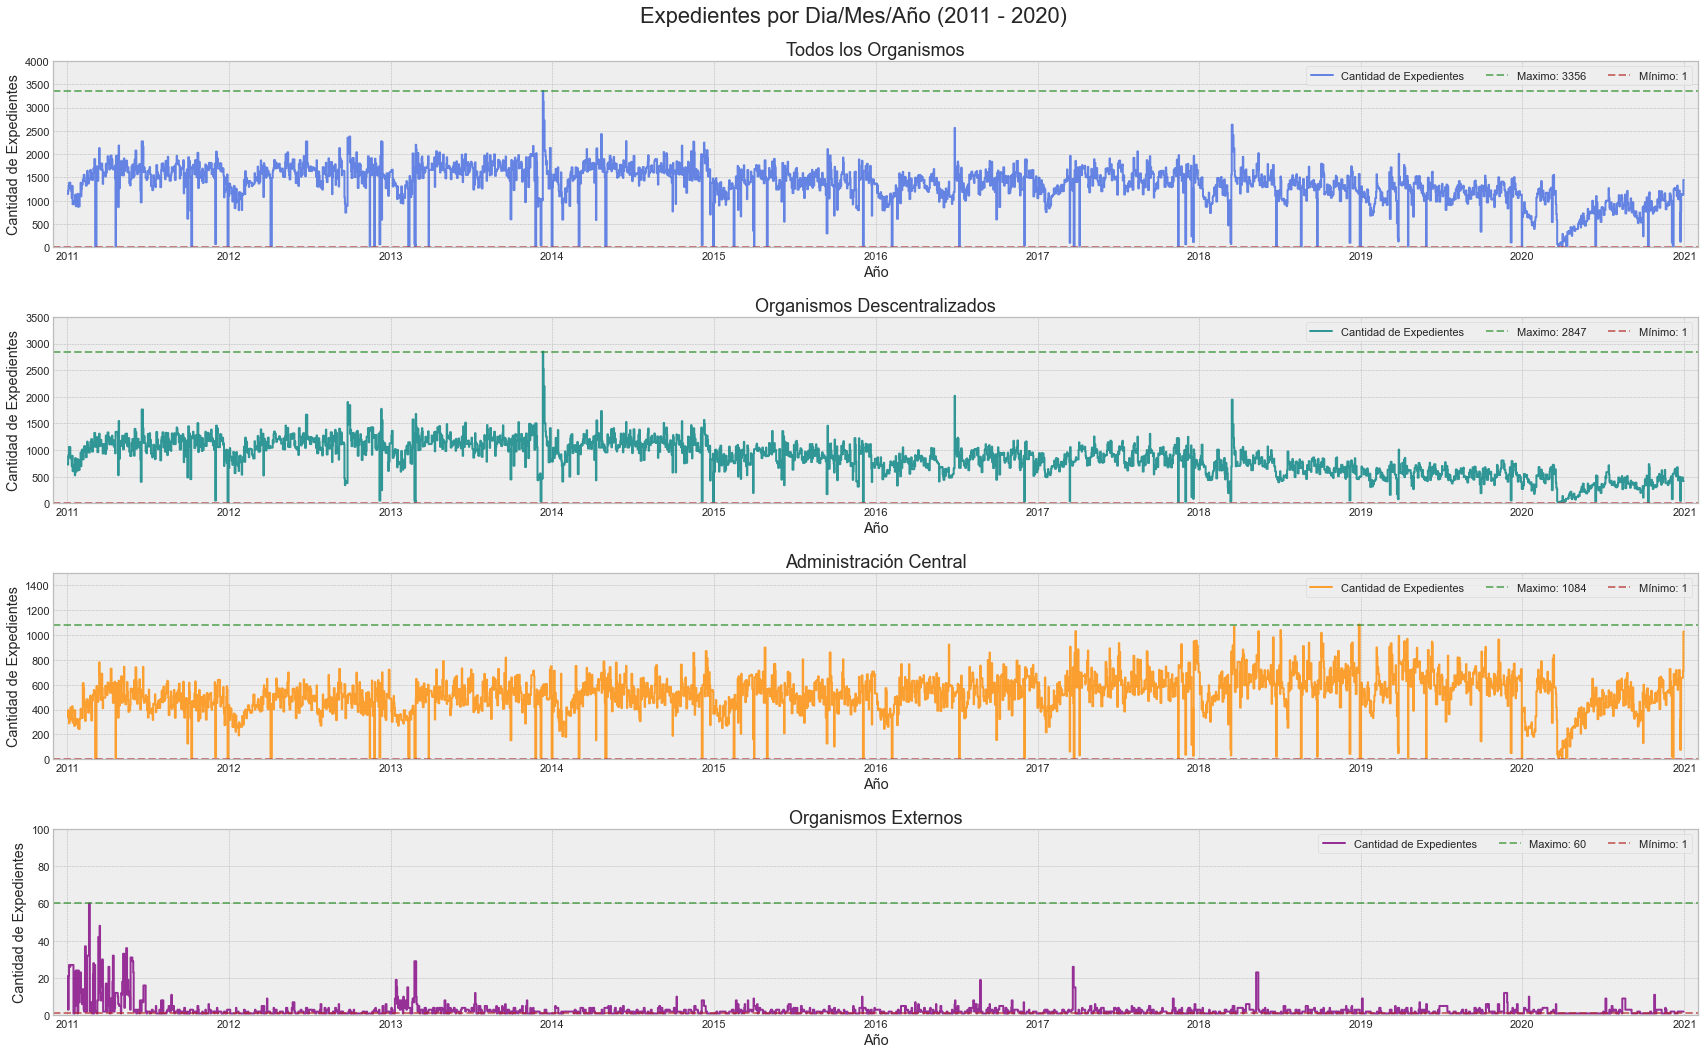

In [105]:
#Grafico la cantidad de expedientes por dia mes, año
# ====================================================================================
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(24, 15), sharex=False)        #Creación de una figura con axis

#Primer Subplot - Expedientes por día, mes y año para todos los Organismos
# ==============================================================================
ax = axes[0]
ax.step(x_d, data_d, where='mid', color="royalblue", alpha=0.8, label = "Cantidad de Expedientes")

ax.axhline(data_d.max(), color="forestgreen", linestyle="--", linewidth=2, alpha=0.6, label=f"Maximo: {data_d.max():.0f}")  # Se Muestra el máximo
ax.axhline(data_d.min(), color="firebrick", linestyle="--", linewidth=2, alpha=0.6, label=f"Mínimo: {data_d.min():.0f}")    # Se Muestra el mínimo

ax.set_xlabel("Año")
ax.set_xlim([dt.date(2010, 12, 1), dt.date(2021, 1, 31)])

ax.set_ylabel("Cantidad de Expedientes")
ax.set_ylim(bottom=0, top=4000)

ax.set_title("Todos los Organismos", fontsize=18)

ax.legend(loc="upper right", ncol=3)


# Segundo Subplot - Expedientes por día, mes y año para el Tipo de Organismo: Organismo Descentralizado
#=======================================================================
ax = axes[1]
ax.step(x_d, data_OD_d, where='mid', color="teal", alpha=0.8, label="Cantidad de Expedientes")

ax.axhline(data_OD_d.max(), color="forestgreen", linestyle="--", linewidth=2, alpha=0.6, label=f"Maximo: {data_OD_d.max():.0f}")  # Se Muestra el máximo
ax.axhline(data_OD_d.min(), color="firebrick", linestyle="--", linewidth=2, alpha=0.6, label=f"Mínimo: {data_OD_d.min():.0f}")    # Se Muestra el mínimo

ax.set_xlabel("Año")
ax.set_xlim([dt.date(2010, 12, 1), dt.date(2021, 1, 31)])

ax.set_ylabel("Cantidad de Expedientes")
ax.set_ylim(bottom=0, top=3500)

ax.set_title("Organismos Descentralizados", fontsize=18)    
ax.legend(loc="upper right", ncol=3)


# Tercer Subplot - Expedientes por día, mes y año para el Tipo de Organismo: Adminsitración Central
#=======================================================================
ax = axes[2]
ax.step(x_d, data_AC_d, where='mid', color="darkorange", alpha=0.8, label="Cantidad de Expedientes")

ax.axhline(data_AC_d.max(), color="forestgreen", linestyle="--", linewidth=2, alpha=0.6, label=f"Maximo: {data_AC_d.max():.0f}")  # Se Muestra el máximo
ax.axhline(data_AC_d.min(), color="firebrick", linestyle="--", linewidth=2, alpha=0.6, label=f"Mínimo: {data_AC_d.min():.0f}")    # Se Muestra el mínimo

ax.set_xlabel("Año")
ax.set_xlim([dt.date(2010, 12, 1), dt.date(2021, 1, 31)])

ax.set_ylabel("Cantidad de Expedientes")
ax.set_ylim(bottom=0, top=1500)

ax.set_title("Administración Central", fontsize=18)    
ax.legend(loc="upper right", ncol=3)


# Cuarto Subplot - Expedientes por día, mes y año para el Tipo de Organismo: Organismos Externo
#=======================================================================
ax = axes[3]
ax.step(x_d, data_OE_d, where='mid', color="purple", alpha=0.8, label="Cantidad de Expedientes")

ax.axhline(data_OE_d.max(), color="forestgreen", linestyle="--", linewidth=2, alpha=0.6, label=f"Maximo: {data_OE_d.max():.0f}")  # Se Muestra el máximo
ax.axhline(data_OE_d.min(), color="firebrick", linestyle="--", linewidth=2, alpha=0.6, label=f"Mínimo: {data_OE_d.min():.0f}")    # Se Muestra el mínimo

ax.set_xlabel("Año")
ax.set_xlim([dt.date(2010, 12, 1), dt.date(2021, 1, 31)])

ax.set_ylabel("Cantidad de Expedientes")
ax.set_ylim(bottom=0, top=100)

ax.set_title("Organismos Externos", fontsize=18)    
ax.legend(loc="upper right", ncol=3)


# Configuración Global
#==========================================================================================================
#ax.set_xlabel("Dia-Mes-Año")
#ax.set_xlim([dt.date(2010, 12, 1), dt.date(2021, 1, 31)])

#plt.FixedLocator(mdates.YearLocator())
ax.xaxis.set_major_locator(mdates.YearLocator())                #Obtiene el año para mostrar en el eje x
#plt.FixedFormatter(mdates.DateFormatter('%m-%Y'))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))     #Formato de fecha del eje x

#ax.set_xticks(rotation=360)


plt.suptitle("Expedientes por Dia/Mes/Año (2011 - 2020)", fontsize=22)    # Se añade un título global
plt.tight_layout(pad=1.5);                                                                    # Se ajusta el espaciado

#### Conclusiones
 - Las conclusiones son similares a las escritas para los gráficos anteriores donde los datos son los mismos, solo que agrupados por mes/año en lugar de agruparos por día/mes/año

___
# División de los Datos (80/20)
Vamos a trabajar con los datos agrupados por día

In [109]:
#Vuelvo a genera el índice del dataframe con la fecha
#=========================================================
df_Fecha_Ini.set_index("Fecha_Ini_Expte", inplace=True)
df_Fecha_Ini.head()

Cant_Expte
Fecha_Ini_Expte            
2011-01-03           1144.0
2011-01-04           1217.0
2011-01-05           1326.0
2011-01-06           1377.0
2011-01-07           1388.0

#### Divido los datos para su posterior entrenamiento. 80% datos para entrenamiento y 20% datos para testeo

In [107]:
# División de los datos: 80/20
#=================================================
size = int(len(df_Fecha_Ini)*0.8)
df_train = df_Fecha_Ini.iloc[:size]
df_test = df_Fecha_Ini.iloc[size:]

Visuailizo los datos de Trainning y Test para ver que hayan quedado secuenciales. Cuando usamos series de tiempo, no es posible mezclar los datos

In [78]:
df_train.tail()

Cant_Expte
Fecha_Ini_Expte            
2018-12-25           1197.0
2018-12-26           1197.0
2018-12-27           1150.0
2018-12-28           1574.0
2018-12-31              1.0

In [69]:
df_test.head()

Cant_Expte
Fecha_Ini_Expte            
2019-01-01              1.0
2019-01-02            974.0
2019-01-03           1309.0
2019-01-04           1093.0
2019-01-07           1165.0

___
# Guardo los dataframe trabajados hasta ahora

In [79]:
df_train.to_csv('df_train.csv', sep=';')
df_test.to_csv('df_test.csv', sep=';')
df_Fecha_Ini.to_csv('df_total.csv', sep=';')

___
## Agrupación de los datos del dataframe con datos del 2021, para usarlos más tarde

In [61]:
df_Fecha_Ini_2021 = df_expte2021.groupby("Fecha_Ini_Expte")["Id_Expte"].agg(['count']).reset_index()
df_Fecha_Ini_2021 = df_Fecha_Ini_2021.rename(columns={'count': 'Cant_Expte'})

In [62]:
df_Fecha_Ini_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Fecha_Ini_Expte  173 non-null    datetime64[ns]
 1   Cant_Expte       173 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.8 KB


In [65]:
# Genero un índice con la fecha
#==================================================================
df_Fecha_Ini_2021.set_index("Fecha_Ini_Expte", inplace=True)
df_Fecha_Ini_2021.head()

Cant_Expte
Fecha_Ini_Expte            
2021-01-02                3
2021-01-04             1069
2021-01-05             1084
2021-01-06             1003
2021-01-07              966

In [66]:
# Relleno las fechas faltante para que la frecuencia de la seria sea siemrpe la misma. 
#==================================================================
#Uso el parámetro "b" como freq que son los "business day", así no tiene en cuenta las sábado y domingos
#Tendría que quitar las feriados de cada año para Santa Fe

df_Fecha_Ini_2021 = df_Fecha_Ini_2021.asfreq(freq = 'b')

In [67]:
df_Fecha_Ini_2021.count()

Cant_Expte    149
dtype: int64

In [68]:
# Verifico si hay fechas que tengan valores nulos en la cantidad de expedientes
#============================================================
df_Fecha_Ini_2021.isna().sum()

Cant_Expte    4
dtype: int64

In [69]:
# Relleno los nulos en el campo "cantidad de expedientes, con el valor del registro de la fecha anterior"
#============================================================================================
df_Fecha_Ini_2021.Cant_Expte = df_Fecha_Ini_2021.Cant_Expte.fillna(method='bfill')

#Luego verifico que no haya mas nulos ejecutando la celda anterior

In [72]:
# Elimina el índice del dataset, para luego poder seprar los datos y graficar
#======================================================================
#df_Fecha_Ini_2021 = df_Fecha_Ini_2021.reset_index()
df_Fecha_Ini_2021.head()

Cant_Expte
Fecha_Ini_Expte            
2021-01-04           1069.0
2021-01-05           1084.0
2021-01-06           1003.0
2021-01-07            966.0
2021-01-08            910.0

### Guardo el Dataframe con los datos del 2021

In [73]:
df_Fecha_Ini_2021.to_csv('df_Fecha_Ini_2021.csv', sep=';')